# Project Summary

## Introduction

Discount using coupons is effective way of marketing. However it comes with high cost and low rewards if it is not done startegically. Hence this project try to recommend who and where to hand coupons to get biggest bang for the buck.Predicting whether a user will accept a coupon is a difficult task because offering coupons to everyone can lead to high costs. This study seeks to develop predictive models that identify the conditions and personal characteristics linked to coupon acceptance. With these models, companies can better target their coupon distribution, concentrating on situations where acceptance is more likely and reducing distribution in less favorable scenarios.

## Objective

The objective is to start with an unsupervised learning analysis to group coupon acceptance based on various features like demographics, travel, weather, and coupon information. After that, a robust supervised learning approach, including classifiers, will be applied to the dataset to develop a model for predicting coupon acceptance.

## Data

The dataset used in this analysis encompasses personal characteristics, weather conditions, and the proximity of establishments to the coupon distribution location.
Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Data Import

In [67]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,recall_score,precision_score,f1_score,balanced_accuracy_score,roc_auc_score,ConfusionMatrixDisplay
import warnings
from catboost import CatBoostClassifier,Pool
warnings.filterwarnings("ignore")

In [68]:
# Input data 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/in-vehicle-coupon-recomendation/in_vehicle_coupon_recomendation.csv


In [69]:
file_path = '/kaggle/input/in-vehicle-coupon-recomendation/in_vehicle_coupon_recomendation.csv'
df = pd.read_csv(file_path)

### Data Description

Below is the peak sample data.

In [70]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [8]:
df.shape

(12684, 26)

Dateset contains has 12684 rows, 25 features , the target variable as coupon accepted or rejected.Below is the short description of the each features. Most of the features are catagorical data. 

    1. Gender: Female, Male
    2. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
    3. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
    4. has_Children: 1: has children, 0: No children
    5. Education: Some college — no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
    6. Occupation: unique 25 number of occupation of users (Unemployed, Architecture & Engineering, Student,Education&Training&Library, Healthcare Support,Healthcare Practitioners & Technical, Sales & Related, Management,Arts Design Entertainment Sports & Media, Computer & Mathematical,Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry)
    7. Income: income of user (Less than \$12500, \$12500 — \$24999, \$25000 — \$37499, \$37500 — \$49999, \$50000 — \$62499, \$62500 — \$74999, \$75000 — \$87499, \$87500 — \$99999, \$100000 or More)
    8. Car : Description of vehicle which driven by user (Scooter and motorcycle, crossover, Mazda5) (99% of values are missing in this feature)
    9. Bar: how many times does the user go to a bar every month? (never, less1, 1~3, 4~8, gt8, nan)
    10. CoffeeHouse: how many times does the user go to a coffeehouse every month? (never, less1, 1~3, 4~8, gt8, nan)
    11. CarryAway: how many times does the user get take-away food every month? (never, less1, 1~3, 4~8, gt8, nan)
    12. RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than \$20 every month? (never, less1, 1\~3, 4\~8, gt8, nan)<br> __13. Restaurant20To50:__ how many times does the user go to a restaurant with average expense per person of \$20 — \$50 every month? (never, less1, 1~3, 4~8, gt8, nan)
    3.2-Contextual attributes:

    1. Destination: destination of user (No Urgent Place, Home, Work)
    2. Passenger: who are the passengers in the car (Alone, Friend(s), Kid(s), Partner)
    3. Weather: weather when user is driving (Sunny, Rainy, Snowy)
    5. Time: time when user driving (2PM, 10AM, 6PM, 7AM, 10PM)
    6. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
    7. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
    8. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
    9. direction_same: whether the restaurant/cafe/bar is in the same direction as user’s current destination (0,1)
    10. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as user’s current destination (0,1)
    3.3-Coupon attributes:

    1. Coupon: coupon type offered by company (Restaurant(<\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\$20-\$50)). Here, <\$20 is the average pay per user in a not too expensive restaurant, Restaurant(\$20-\$50) means the average pay per user is between \$20 to \$50 which little bit expensive restaurant.
    2. Expiration: coupon expires in 1 day or in 2 hours (1d, 2h)
    3.4-Target attribute:

    1. Y: whether the coupon is accepted or rejected, 1:accepted, 0:rejected


# Data Cleaning

Let us first look at summary of datatype ,unique and null count

In [71]:
# Get the count of unique values, null values, and data types for each feature
unique_counts = df.nunique()
null_counts = df.isnull().sum()
data_types = df.dtypes

# Combine the information into a DataFrame
summary = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values Count': unique_counts,
    'Null Values Count': null_counts
})

# Print the summary
print(summary)

                     Data Type  Unique Values Count  Null Values Count
destination             object                    3                  0
passanger               object                    4                  0
weather                 object                    3                  0
temperature              int64                    3                  0
time                    object                    5                  0
coupon                  object                    5                  0
expiration              object                    2                  0
gender                  object                    2                  0
age                     object                    8                  0
maritalStatus           object                    5                  0
has_children             int64                    2                  0
education               object                    6                  0
occupation              object                   25                  0
income

Looking at the table above we can see **toCoupon_GEQ5min**  only have one unique value.In addition null value count for **car** is  12576 out of 12684.Hence we get drop these column all together since these does not add any value on model building and evaluation.

In [72]:
df = df.drop(columns=['toCoupon_GEQ5min'])
df = df.drop(columns=['car'])

### Handling missing data

The rest of the columns containing  null values ('Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50') can be imputed with the mode 


In [73]:
#imputation using mode or most frequent value
df = df.fillna(df.mode().iloc[0])

### Handle Duplicated Data

In [74]:
df.duplicated().sum()

74

In [75]:
df = df.drop_duplicates()

In [76]:
# Get the count of unique values, null values, and data types for each feature
unique_counts = df.nunique()
null_counts = df.isnull().sum()
data_types = df.dtypes

# Combine the information into a DataFrame
summary = pd.DataFrame({
    'Data Type': data_types,
    'Unique Values Count': unique_counts,
    'Null Values Count': null_counts
})

# Print the summary
print(summary)

                     Data Type  Unique Values Count  Null Values Count
destination             object                    3                  0
passanger               object                    4                  0
weather                 object                    3                  0
temperature              int64                    3                  0
time                    object                    5                  0
coupon                  object                    5                  0
expiration              object                    2                  0
gender                  object                    2                  0
age                     object                    8                  0
maritalStatus           object                    5                  0
has_children             int64                    2                  0
education               object                    6                  0
occupation              object                   25                  0
income

In [12]:
df.shape

(12610, 24)

**Conclusion** We have dropped two features 'car' for missing 99 % data and  toCoupon_GEQ5min for having only one type in data variations. We also filled 'NAs' with mode for missing values.

After data cleaning, we now have no null values and 24 features with the same number of rows.

# Exploratory Data Analysis(EDA)

In [77]:


y = df['Y'].value_counts()

px.bar(x = y.index , y = y, title = 'Y Value', width = 600, height = 400, color = y.index)



There are more no of accepatance coupon then rejection in the data

Now let us look some of the interesing features and can find any patterns on the data

In [78]:
# Function for EDA
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)
    
    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()

    return df_EDA


Let us check where the most coupons are distributed

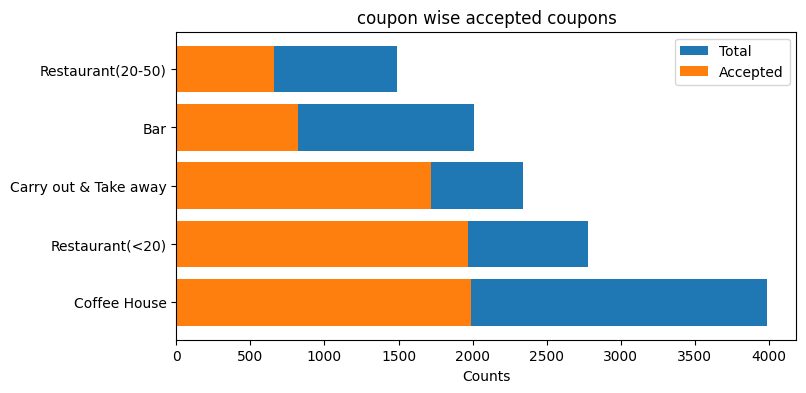

,coupon,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,Coffee House,3989,31.634,1989,2000,49.862,50.138
4,Restaurant(<20),2779,22.038,1967,812,70.781,29.219
1,Carry out & Take away,2344,18.588,1720,624,73.379,26.621
0,Bar,2010,15.940,824,1186,40.995,59.005
3,Restaurant(20-50),1488,11.800,657,831,44.153,55.847


In [16]:
univariate_analysis(df,'coupon')

**Observations-** Maximum coupons accepted by users are Carry out & Take away and Restaurant(<20) coupons.

Let us check which age groups are more interested in coupons.

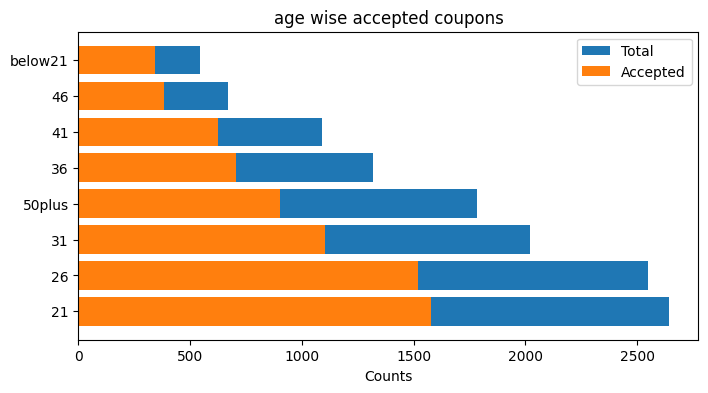

,age,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
0,21,2642,20.952,1579,1063,59.765,40.235
1,26,2548,20.206,1517,1031,59.537,40.463
2,31,2019,16.011,1102,917,54.581,45.419
6,50plus,1781,14.124,903,878,50.702,49.298
3,36,1317,10.444,705,612,53.531,46.469
4,41,1089,8.636,623,466,57.208,42.792
5,46,670,5.313,384,286,57.313,42.687
7,below21,544,4.314,344,200,63.235,36.765


In [14]:
univariate_analysis(df,'age')

**Observations**:

    Most users in this data have ages between 21 to 26 years.
    The users whose age is below 21 years have the highest coupon acceptance ratio.

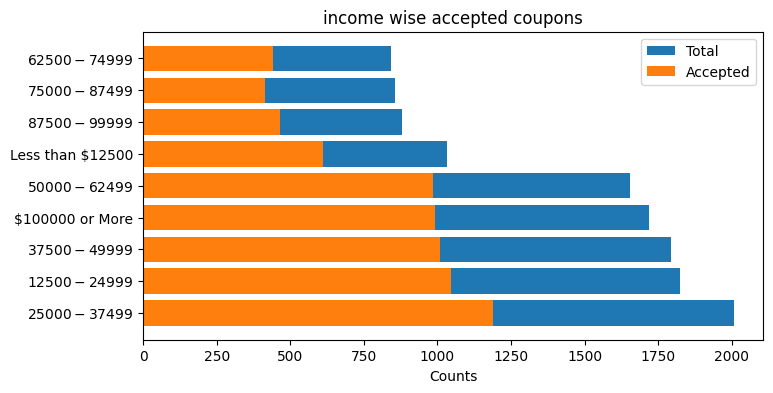

,income,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
2,$25000 - $37499,2006,15.908,1190,816,59.322,40.678
1,$12500 - $24999,1825,14.473,1047,778,57.370,42.630
3,$37500 - $49999,1795,14.235,1010,785,56.267,43.733
0,$100000 or More,1717,13.616,992,725,57.775,42.225
4,$50000 - $62499,1655,13.125,984,671,59.456,40.544
8,Less than $12500,1034,8.200,612,422,59.188,40.812
7,$87500 - $99999,879,6.971,465,414,52.901,47.099
6,$75000 - $87499,856,6.788,414,442,48.364,51.636
5,$62500 - $74999,843,6.685,443,400,52.550,47.450


In [24]:
univariate_analysis(df,'income')

**Observations**:
    Users who have income below 62 K are accpeting the coupons
    Users who have medium-range income are mostly rejecting the coupon.



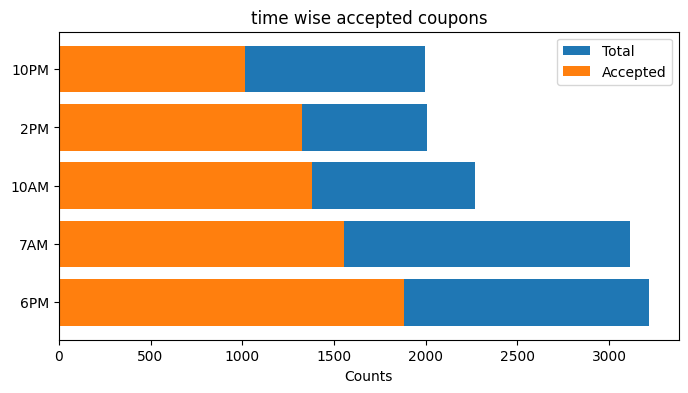

,time,Total_Count,Total_%,Accepted,Rejected,%Accepted,%Rejected
3,6PM,3220,25.535,1881,1339,58.416,41.584
4,7AM,3114,24.695,1553,1561,49.872,50.128
0,10AM,2271,18.010,1380,891,60.766,39.234
2,2PM,2006,15.908,1327,679,66.152,33.848
1,10PM,1999,15.852,1016,983,50.825,49.175


In [25]:
univariate_analysis(df,'time')

**Observations**:
Most of the time users go out when the time is 6 PM and 7 AM.
The users mostly accept coupons when the time is 2 PM and 10 AM.



We need to change all string categorical data into integer. I utilized the LabelEncoder function in sklearn to do this instead of manually mapping each instance to a value.

In [79]:
label_encoder = preprocessing.LabelEncoder()
for col in df:
    df[col]= label_encoder.fit_transform(df[col])

**Conclusion**
The dependent class is not evenly distributed; there is a notable difference in the sizes of the classes. In contrast, the other categorical variables display a relatively even distribution.
Variables such as direction and time to reach (direction_opp, GEQ_25, GEQ_15) which will not be important for our 
analysis as well, show a very uneven spread of sub-categories.
Occupation obviously has too many sub-categories as expected.


### Correlation

Lets test the correlation between the data and find the most correlated feature to our result

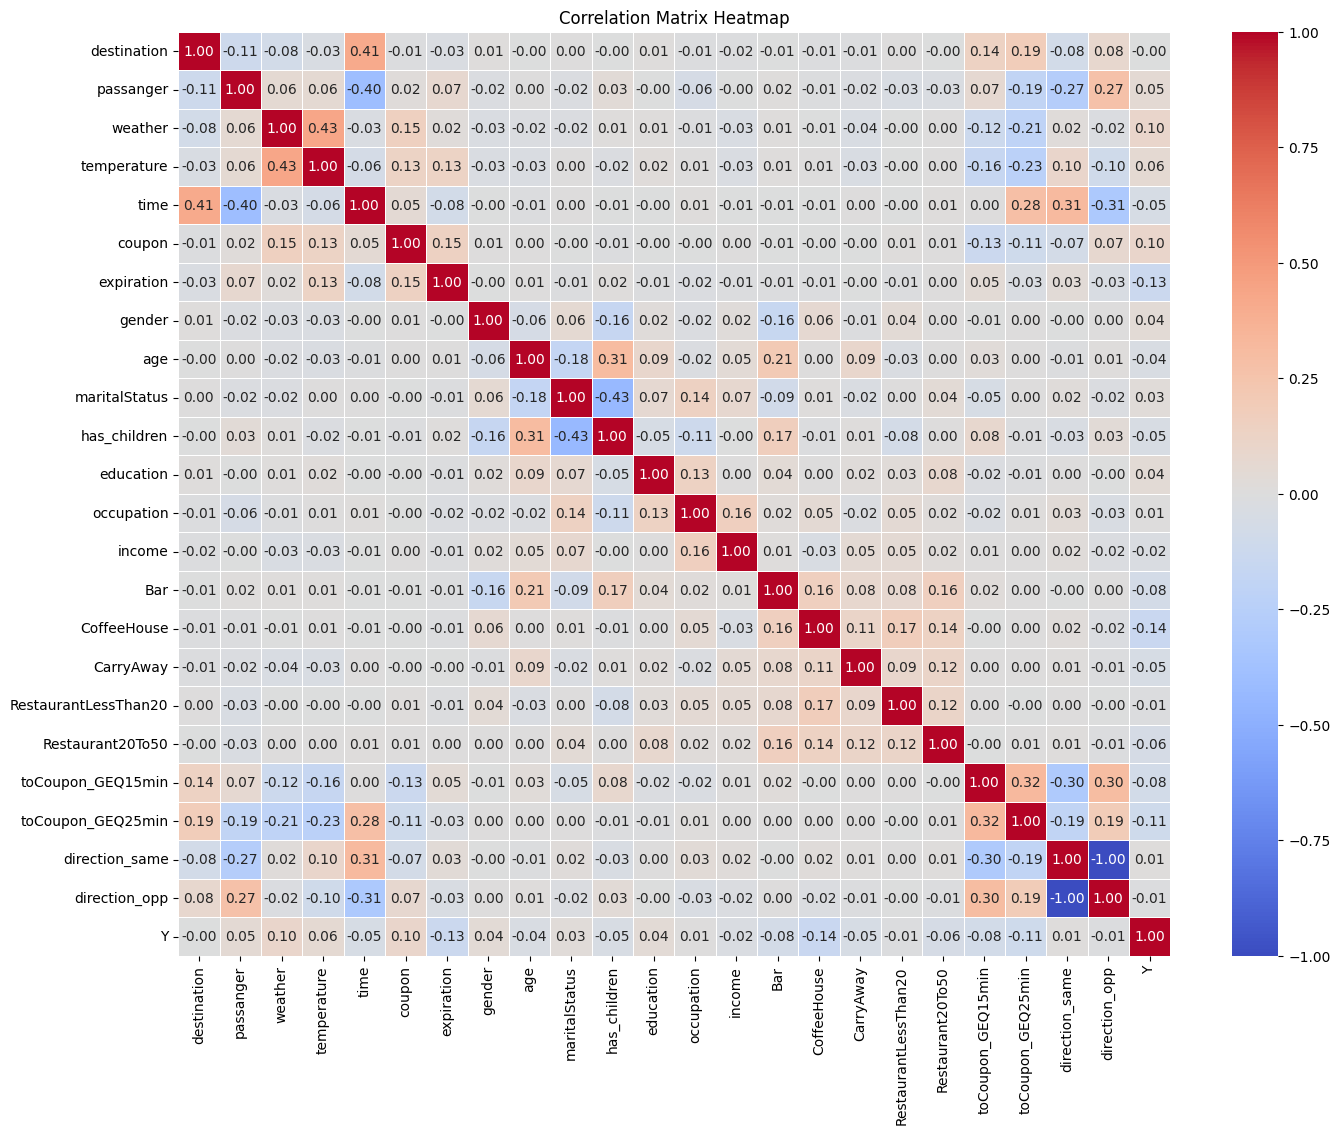

In [17]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.4)
plt.title('Correlation Matrix Heatmap')
plt.show()

From the above corrleation matrix, we can see there are not much correlation betweeen the variables. There are few features which seems to have some correlation (Destination Vs Time, time vs direction same.Even the most correlated feature isn't sufficiently correlated to justify using a linear model, but let's test it with some of the features anyway.

In [18]:
model = smf.ols(formula='Y ~ destination + time + direction_same  ', data=df)
 
res = model.fit() #update this value according to the result
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     17.28
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           3.39e-11
Time:                        12:09:43   Log-Likelihood:                -9010.2
No. Observations:               12610   AIC:                         1.803e+04
Df Residuals:                   12606   BIC:                         1.806e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5931      0.009     65.

**Observation**
For all features, P-values way less that acceptable cutoff 0.05. Hence we can conclude there is no correlation betwen the features.

# Models

First, we assign the features to X and the target variable to Y.

In [80]:
#Split data into parameters and result 
X = df.drop(columns='Y').copy()
Y = df[['Y']].copy()


Next, we split the data into training and testing sets, using an 80/20 split.

In [81]:
#Split data into training and testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

Since most of the features in the dataset are categorical, I'll begin by building models using a Decision Tree classifier. 

In [82]:
#Decision Tree Classifier with random initial parameters 
classifier = DecisionTreeClassifier(max_depth=10, random_state=14)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
acc_score = accuracy_score(y_true=y_test, y_pred = pred)

print("Accuracy Score for initial DTC:", acc_score)

Accuracy Score for initial DTC: 0.7137192704203014


An accuracy score of 0.71 is quite good, but let's build a few more models to see if we can achieve better results.

In [39]:
models = {
    'logit':LogisticRegression,
    'decisionTree':DecisionTreeClassifier,
    'randomForest':RandomForestClassifier,
    'GradientBoost':GradientBoostingClassifier,
    'ExtraTrees':ExtraTreesClassifier,
    'adaboost':AdaBoostClassifier,
    'sgd':SGDClassifier,
     'catboost':CatBoostClassifier,
}

In [41]:
def find_model(models_li,x_train,y_train,x_test,y_test):
  data_frame = {'acc':[],'recall':[],'precision':[],'roc_auc':[]}

  for model_key,model in models_li.items() :
    m = None
    if model_key == 'logit':
       m = make_pipeline(StandardScaler(),model(random_state = 212))
    elif model_key == 'sgd':
      m = make_pipeline(StandardScaler(),model(loss = 'log_loss',random_state = 212))
    else :
      m = model(random_state = 212)

    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    y_pred_proba = m.predict_proba(x_test)[:,1]
    data_frame['acc'].append(balanced_accuracy_score(y_test,y_pred))
    data_frame['recall'].append(recall_score(y_test,y_pred))
    data_frame['precision'].append(precision_score(y_test,y_pred))
    data_frame['roc_auc'].append(roc_auc_score(y_test,y_pred_proba))
  return pd.DataFrame(data_frame,index = list(models_li.keys()))

In [42]:
%%capture
result = find_model(models, x_train, y_train, x_test, y_test)


In [43]:
result 

,acc,recall,precision,roc_auc
logit,0.601694,0.774566,0.622532,0.658861
decisionTree,0.674931,0.718931,0.703180,0.675244
randomForest,0.727940,0.817919,0.733161,0.803518
GradientBoost,0.707593,0.827312,0.709418,0.783443
ExtraTrees,0.719065,0.798410,0.729373,0.789954
adaboost,0.657875,0.783237,0.670792,0.730939
sgd,0.581532,0.745665,0.608850,0.625783
catboost,0.748523,0.838873,0.749032,0.830565


The table presents the performance of various machine learning models across four evaluation metrics: accuracy (acc), recall, precision, and ROC AUC (roc_auc). Here’s a summary of the results:

    CatBoost emerges as the top performer with the highest scores across all metrics: an accuracy of 0.748523, recall of 0.838873, precision of 0.749032, and a ROC AUC of 0.830565.

    RandomForest also performs well, particularly in recall (0.817919) and ROC AUC (0.803518), indicating it’s strong at capturing true positives.

    GradientBoost and ExtraTrees show strong performance, with accuracy and recall both over 0.7 and ROC AUC scores close to 0.8.

    DecisionTree and Adaboost are mid-performers, with decent recall and precision but lower accuracy and ROC AUC scores compared to the top models.

    Logistic Regression (logit) and SGD (Stochastic Gradient Descent) are the lowest performers, with lower accuracy, precision, and ROC AUC scores, indicating they might not be as effective for this dataset.

In conclusion, CatBoost is the best choice for this particular task, showing the highest balance of accuracy, recall, precision, and overall model quality as measured by ROC AUC.

# Results and analysis

An accuracy score of 72.79% is promising for random initial values, but Let us use feature selection techniques to grab most important features and see if we can improve the results

## Feature selection

In [83]:
# setting random variable for feature selection

x_train['rand_int'] = np.random.random(size = len(x_train))
x_test['rand_int'] = np.random.random(size = len(y_test))



In [84]:
r = SMOTE(random_state=42)

X_train_resample,y_train_resample = r.fit_resample(x_train,y_train)

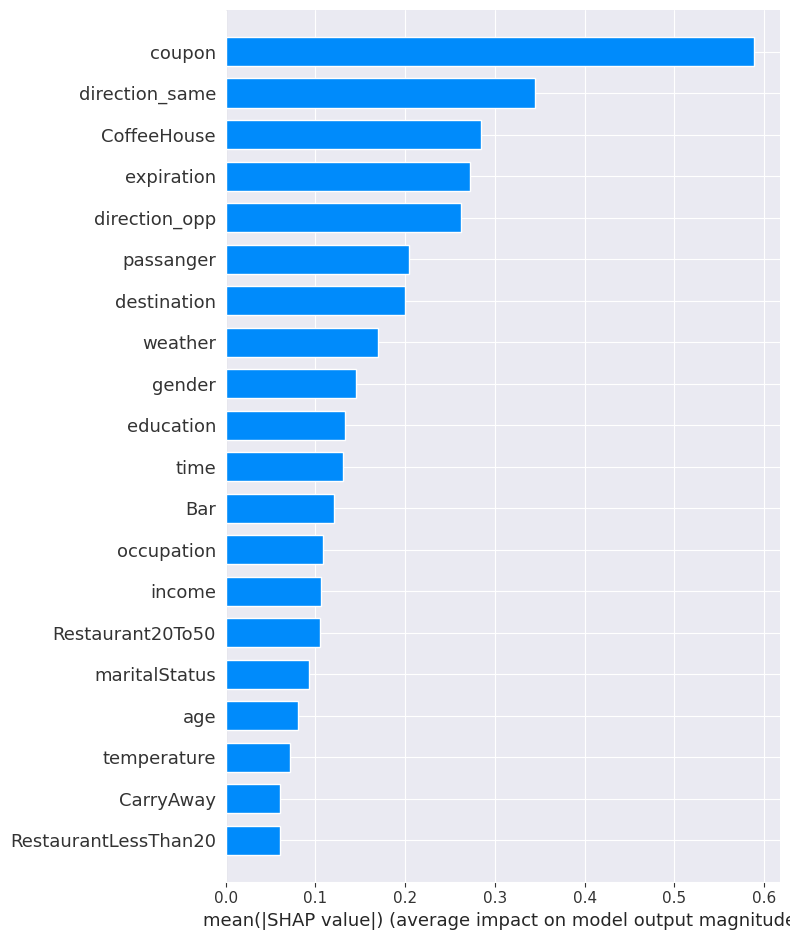

In [85]:
import shap

final_model = models['catboost'](logging_level = 'Silent',random_state =212)
final_model.fit(X_train_resample,y_train_resample)
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_train_resample)
shap.summary_plot(shap_values, X_train_resample, plot_type='bar')

The analysis highlights that the type of coupon, direction of travel, and social context (like the presence of a passenger) are key drivers in predicting whether a user will accept a coupon. This insight can be used to tailor coupon distribution strategies to maximize acceptance rates.

In [86]:
imp_value = pd.Series(np.mean(np.abs(shap_values),axis = 0),index = X_train_resample.columns).sort_values(ascending = False)
imp_value_li = imp_value[imp_value >  imp_value['rand_int']].index.to_list()

In [87]:
final_model = models['catboost'](logging_level = 'Silent',random_state = 212)

X_train_new  = X_train_resample[imp_value_li]
X_test_new = x_test[imp_value_li]

final_model.fit(X_train_new,y_train_resample)

y_pred= final_model.predict(X_test_new)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1076
           1       0.79      0.80      0.80      1446

    accuracy                           0.76      2522
   macro avg       0.76      0.76      0.76      2522
weighted avg       0.76      0.76      0.76      2522



##   Evaluation Metrics

From the above classfication report, we can conclude model performed better once feature selection technique is applied to compared to orginal dataset.

In [88]:
y_pred_proba = final_model.predict_proba(X_test_new)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

cm = confusion_matrix(y_test,y_pred)

fig = px.imshow(cm , x = ['False Positive','True Positive'],y = ['True Negative','False Negative'],
                labels = dict(x = 'Predicted', y = 'True Value'),text_auto=True,width=700, height=500)

fig.update_layout(title = 'Confusion Matrix')

fig2 = px.line(x=fpr, y=tpr,labels=dict(x='False Positive Rate', y='True Positive Rate'),width=700, height=500)

fig2.add_shape(type = 'line', x0 = 0, x1 = 1, y0 = 0, y1 = 1,line = dict(dash = 'dash'))

fig2.update_layout(title = f'Roc Curve ( AUC : {round(roc_auc_score(y_test, y_pred_proba[:,1]),3)} )')

fig.show()
fig2.show()

The model performs well with a significant number of true positives (1,158) and true negatives (770), which indicates a good balance between sensitivity (recall) and specificity.
The presence of 306 false positives and 288 false negatives suggests there is room for improvement, especially in reducing the number of misclassifications.
Overall, the confusion matrix suggests the model is effective but might benefit from further tuning or alternative strategies to minimize errors.

The model shows good performance on the test dataset. It's shown by the high recall and precision rate, which reduce the amount of false positive and false negative value in the confusion matrix.

In addition, the AUC value is 0.765 and the shape of the curve is above the dashed line. This indicates that this model is a good predictor.


# Discussion and Conclusion

## Discussion

This analysis involved the development and evaluation of various machine learning models to predict coupon acceptance based on a variety of features, including demographics, travel, weather, and coupon-specific information.

Model Performance:

    Several models were tested, including Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Extra Trees, AdaBoost, Stochastic Gradient Descent (SGD), and CatBoost. Among these, CatBoost emerged as the top-performing model across multiple metrics: accuracy (74.85%), recall (83.88%), precision (74.90%), and ROC AUC (83.06%). This indicates that CatBoost not only captures the correct classifications effectively but also maintains a high balance between identifying true positives and minimizing false positives.
    
Feature Importance:

    Using SHAP values to interpret the CatBoost model, it was identified that the type of coupon is the most influential feature in predicting coupon acceptance. Other significant factors include the direction of travel, particularly whether it aligns with the destination, and the frequency of visiting coffee houses. Features like expiration time, passenger presence, and weather also contribute to the model's predictions, albeit to a lesser extent.  
    
Confusion Matrix Insights:

    The confusion matrix further confirmed the robustness of the CatBoost model, showing a substantial number of true positives (1,158) and true negatives (770), indicating the model's ability to correctly identify both accepted and rejected coupons. However, the model did produce some false positives (306) and false negatives (288), suggesting areas where further refinement could be beneficial.    

## Conclusion

The results suggest that CatBoost is a highly effective model for predicting coupon acceptance in this dataset, especially when considering the high accuracy, recall, precision, and ROC AUC scores it achieved. The feature importance analysis provides valuable insights into the factors that most influence coupon acceptance, which can guide businesses in targeting their marketing efforts more effectively.
While the model performs well overall, there is still room for improvement, particularly in reducing the false positive and false negative rates. Further model tuning, perhaps with techniques like GridSearchCV, or exploring additional features could enhance the model’s predictive power.

**In conclusion, this analysis demonstrates that machine learning, particularly with models like CatBoost, can be effectively employed to predict coupon acceptance, allowing companies to optimize their marketing strategies and improve customer engagement.**